<a href="https://colab.research.google.com/github/Zahid8/Pytorch-Geometric/blob/main/Graph_Neural_Networks_without_tags(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Install required packages.
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

# Helper function for visualization.
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt


def visualize_graph(G, color):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])
    nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                     node_color=color, cmap="Set2")
    plt.show()


def visualize_embedding(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])
    h = h.detach().cpu().numpy()
    plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
    if epoch is not None and loss is not None:
        plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    plt.show()

1.11.0+cu113


In [1]:
pip install torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric -f https://data.pyg.org/whl/torch-1.11.0+cu113.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.11.0+cu113.html
     |████████████████████████████████| 7.9 MB 33.8 MB/s 
     |████████████████████████████████| 3.5 MB 15.3 MB/s 
     |████████████████████████████████| 2.5 MB 51.3 MB/s 
     |████████████████████████████████| 750 kB 43.0 MB/s 
     |████████████████████████████████| 407 kB 20.2 MB/s 
  Created wheel for torch-geometric: filename=torch_geometric-2.0.4-py3-none-any.whl size=616603 sha256=9facb0f7d2029807b95c25d36cbe0f607969d48b35925147f24ed2ec76ee814c
  Stored in directory: /root/.cache/pip/wheels/18/a6/a4/ca18c3051fcead866fe7b85700ee2240d883562a1bc70ce421
Successfully built torch-geometric


In [20]:
!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-1.10.0+cu113.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-1.10.0+cu113.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

In [2]:
import os

com_wget = "sudo wget " +"https://github.com/prasmussen/gdrive/releases/download/2.1.1/gdrive_2.1.1_linux_386.tar.gz"
com_unzip = "sudo tar -xzf gdrive_2.1.1_linux_386.tar.gz"
com_permission = "sudo chmod +x gdrive"
com_install_executor = "sudo install gdrive /usr/local/bin/gdrive"

os.system(com_wget)
os.system(com_unzip)
os.system(com_permission)
os.system(com_install_executor)

0

In [3]:
!sudo gdrive list

Authentication needed
Go to the following url in your browser:
https://accounts.google.com/o/oauth2/auth?access_type=offline&client_id=367116221053-7n0vf5akeru7on6o2fjinrecpdoe99eg.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&state=state

Enter verification code: 4/1AX4XfWhkUSR5LWWcFQeCIu35iqqpihg5D0GMV9ww3gVDb4XyMM1fu-gc_D0
Id                                  Name                    Type   Size      Created
10XzbooTnjys8yxcduTJpZaaDL6PbmLcb   slide3.xml              bin    2.2 KB    2022-02-10 08:02:09
1g1uruVRN_Cyg2gW_Zd7z9ZtlxdowfD7B   presentation.xml.rels   bin    4.7 KB    2022-02-10 08:02:15
10SIKJo-eOXyGcB7RWBIRoNf3eQrP8a32   image7.png              bin    15.4 KB   2022-02-10 08:01:54
1taMBfzvCb7trwKucsHKCn9fpi2fuI766   image9.png              bin    29.4 KB   2022-02-10 08:01:53
10lW8cXEKLpMVJgS0Y-O2B8zHQPAY5ppZ   slideLayout2.xml.rels   bin    311.0 B   2022-02-10 08:05:32

In [4]:
!gdrive download 1cbo1h7hZ-s0uHI4-bBcHbpHjoQ9qhOv-
!gdrive download 1kk_5zr_5PxGEKm3BBn0hoEsLdU43cyto
!gdrive download 1BrSSOJG40yDy-GJNsWwZoRkfsAbBpvxF
!gdrive download 1fyIpqQbczJld5xCUloFsXIm_bOrdFKNH

Downloaded 1cbo1h7hZ-s0uHI4-bBcHbpHjoQ9qhOv- at 458.4 KB/s, total 458.4 KB
Downloaded 1kk_5zr_5PxGEKm3BBn0hoEsLdU43cyto at 217.2 KB/s, total 217.2 KB
Downloaded 1BrSSOJG40yDy-GJNsWwZoRkfsAbBpvxF at 638.0 B/s, total 638.0 B
Downloaded 1fyIpqQbczJld5xCUloFsXIm_bOrdFKNH at 9.9 MB/s, total 9.9 MB


In [5]:
import torch
import os
import pandas as pd
#from torch_geometric.data import InMemoryDataset, Data, download_url, extract_zip
#from torch_geometric.utils.convert import to_networkx
import networkx as nx
from tqdm import tqdm
import matplotlib.pyplot as plt

In [6]:
raw_dir = "/content"

path = os.path.join(raw_dir, 'playlist.node_attrs')
node_attrs = pd.read_csv(path, sep=',', header=None)
node_attrs.index += 1

path = os.path.join(raw_dir, 'playlist.edges')
edge_index = pd.read_csv(path, sep=',', names=['source', 'target'])
edge_index.index += 1

path = os.path.join(raw_dir, 'playlist.graph_idx')
graph_idx = pd.read_csv(path, sep=',', names=['idx'])
graph_idx.index += 1

path = os.path.join(raw_dir, 'playlist.graph_labels')
graph_labels = pd.read_csv(path, sep=',', names=['label'])
graph_labels.index += 1

In [7]:
g_idx=23

node_ids = graph_idx.loc[graph_idx['idx']==g_idx].index
            
# Node features
attributes = node_attrs.loc[node_ids, :]

# Edges info
edges = edge_index.loc[edge_index['source'].isin(node_ids)]
edges_ids = edges.index

# Graph label
label = graph_labels.loc[g_idx]

In [8]:
print("Nodes:", node_ids.shape)
print("Attributes:", attributes.shape)
print("Edges:", edges.shape)
print("Label:", label.shape)

Nodes: (33,)
Attributes: (33, 10)
Edges: (774, 2)
Label: (1,)


In [9]:
print("Nodes:", node_ids)
print("Attributes:", attributes)
print("Edges:", edges)
print("Label:", label)

Nodes: Int64Index([936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948,
            949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961,
            962, 963, 964, 965, 966, 967, 968],
           dtype='int64')
Attributes:      0  1  2  3  4  5  6  7  8  9
936  0  0  0  0  0  0  0  0  0  0
937  0  0  0  0  0  0  0  0  0  0
938  0  0  0  0  0  0  0  0  0  0
939  0  0  0  0  0  0  0  0  0  0
940  0  0  0  0  0  0  0  0  0  0
941  0  0  0  0  0  0  0  0  0  0
942  0  0  0  0  0  0  0  0  0  0
943  0  0  0  0  0  0  0  0  0  0
944  0  0  0  0  0  0  0  0  0  0
945  0  0  0  0  0  0  0  0  0  0
946  0  0  0  0  0  0  0  0  0  0
947  0  0  0  0  0  0  0  0  0  0
948  0  0  0  0  0  0  0  0  0  0
949  0  0  0  0  0  0  0  0  0  0
950  0  0  0  0  0  0  0  0  0  0
951  0  0  0  0  0  0  0  0  0  0
952  0  0  0  0  0  0  0  0  0  0
953  0  0  0  0  0  0  0  0  0  0
954  0  0  0  0  0  0  0  0  0  0
955  0  0  0  0  0  0  0  0  0  0
956  0  0  0  0  0  0  0  0  0  0
957  

In [10]:
edge_idx = torch.tensor(edges.to_numpy().transpose(), dtype=torch.long)
map_dict = {v.item():i for i,v in enumerate(torch.unique(edge_idx))}
map_edge = torch.zeros_like(edge_idx)
for k,v in map_dict.items():
    map_edge[edge_idx==k] = v

In [11]:
map_dict, map_edge, map_edge.shape

({936: 0,
  937: 1,
  938: 2,
  941: 3,
  942: 4,
  943: 5,
  944: 6,
  945: 7,
  946: 8,
  947: 9,
  948: 10,
  949: 11,
  950: 12,
  951: 13,
  952: 14,
  953: 15,
  954: 16,
  956: 17,
  957: 18,
  959: 19,
  961: 20,
  962: 21,
  963: 22,
  964: 23,
  965: 24,
  966: 25,
  967: 26,
  968: 27,
  971: 28,
  972: 29,
  973: 30,
  976: 31,
  979: 32,
  984: 33,
  985: 34,
  986: 35,
  987: 36,
  990: 37,
  991: 38,
  994: 39,
  997: 40,
  1000: 41,
  1002: 42,
  1009: 43,
  1010: 44,
  1017: 45,
  1021: 46,
  1022: 47,
  1025: 48,
  1028: 49,
  1038: 50,
  1039: 51,
  1043: 52,
  1046: 53,
  1047: 54,
  1064: 55,
  1069: 56,
  1071: 57,
  1091: 58,
  1099: 59,
  1102: 60,
  1125: 61,
  1126: 62,
  1146: 63,
  1149: 64,
  1150: 65,
  1152: 66,
  1153: 67,
  1160: 68,
  1162: 69,
  1163: 70,
  1178: 71,
  1179: 72,
  1190: 73,
  1199: 74,
  1204: 75,
  1206: 76,
  1208: 77,
  1209: 78,
  1210: 79,
  1211: 80,
  1214: 81,
  1217: 82,
  1218: 83,
  1219: 84,
  1222: 85,
  1225: 86,
  1226:

In [12]:
attrs = torch.tensor(attributes.to_numpy(), dtype=torch.float)
pad = torch.zeros((attrs.shape[0], 4), dtype=torch.float)
x = torch.cat((attrs, pad), dim=-1)

edge_idx = map_edge.long()

np_lab = label.to_numpy()
y = torch.tensor(np_lab if np_lab[0] == 1 else [0], dtype=torch.long)

In [13]:
x.shape

torch.Size([33, 14])

In [14]:
from torch_geometric.data import Data
import itertools
import numpy as np


In [15]:
graph = Data(x=x, edge_index=edge_idx,  y=y)

In [17]:
!sudo apt-get install python-networkx

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  python-decorator python-pkg-resources python-yaml
Suggested packages:
  python-matplotlib python-pydotplus python-scipy python-pygraphviz
  | python-pydot python-setuptools
The following NEW packages will be installed:
  python-decorator python-networkx python-pkg-resources python-yaml
0 upgraded, 4 newly installed, 0 to remove and 45 not upgraded.
Need to get 1,056 kB of archives.
After this operation, 5,073 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python-decorator all 4.1.2-1 [9,300 B]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 python-networkx all 1.11-1ubuntu3 [804 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main

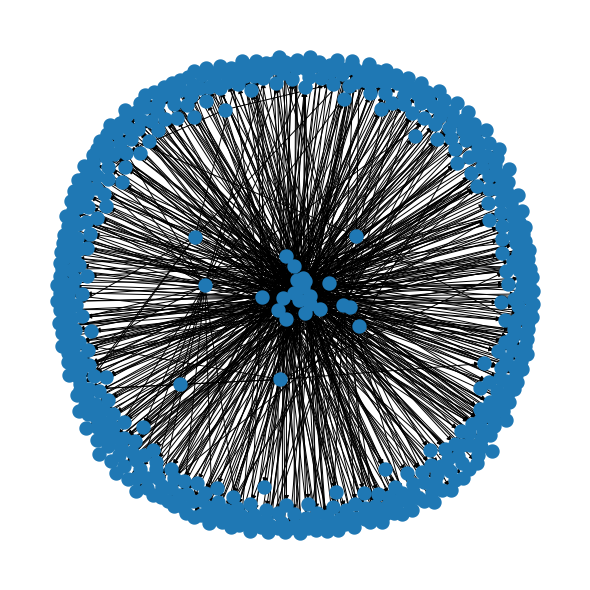

In [22]:
from torch_geometric.utils import to_networkx
vis = to_networkx(graph)
plt.figure(1,figsize=(8,8)) 
nx.draw(vis, cmap=plt.get_cmap('Set3'),node_size=70,linewidths=6)
plt.show()

In [30]:
digit = x[6].reshape(14,14)
plt.matshow(digit, cmap='gray')

RuntimeError: ignored

In [35]:
import torch
import os
import pandas as pd
from torch_geometric.data import InMemoryDataset, Data, download_url, extract_zip
from torch_geometric.utils.convert import to_networkx
import networkx as nx
from tqdm import tqdm


class PLAYLIST(InMemoryDataset):
    
    # Base url to download the files
    url = 'https://github.com/Zahid8/Pytorch-Geometric/blob/main/playlist.zip?raw=true'
    
    def __init__(self, root, transform=None, pre_transform=None):
        super(PLAYLIST, self).__init__(root, transform, pre_transform)
        self.data, self.slices = torch.load(self.processed_paths[0])

    @property
    def raw_file_names(self):
        # List of the raw files
        return ['playlist.edges', 'playlist.graph_idx',
                'playlist.graph_labels', 'playlist.node_attrs']

    @property
    def processed_file_names(self):
        return 'data.pt'

    def download(self):
        # Download the file specified in self.url and store
        # it in self.raw_dir
        path = download_url(self.url, self.raw_dir)
        extract_zip(path, self.raw_dir)
        # The zip file is removed
        os.unlink(path)


    def process(self):
        # Read the files' content as Pandas DataFrame. Nodes and graphs ids
        # are based on the file row-index, we adjust the DataFrames indices
        # by starting from 1 instead of 0.
        
        path = os.path.join(self.raw_dir, 'playlist.node_attrs')
        node_attrs = pd.read_csv(path, sep=',', header=None)
        node_attrs.index += 1
        
        path = os.path.join(self.raw_dir, 'playlist.edges')
        edge_index = pd.read_csv(path, sep=',', names=['source', 'target'])
        edge_index.index += 1
        
        path = os.path.join(self.raw_dir, 'playlist.graph_idx')
        graph_idx = pd.read_csv(path, sep=',', names=['idx'])
        graph_idx.index += 1
        
        path = os.path.join(self.raw_dir, 'playlist.graph_labels')
        graph_labels = pd.read_csv(path, sep=',', names=['label'])
        graph_labels.index += 1
        
        
        # In the loop we extract the nodes' embeddings, edges connectivity for 
        # and label for a graph, process the information and put it in a Data
        # object, then we add the object to a list
        data_list = []
        ids_list = graph_idx['idx'].unique()
        for g_idx in tqdm(ids_list):
            node_ids = graph_idx.loc[graph_idx['idx']==g_idx].index
            
            # Node features
            attributes = node_attrs.loc[node_ids, :]
            
            # Edges info
            edges = edge_index.loc[edge_index['source'].isin(node_ids)]
            edges_ids = edges.index
            
            # Graph label
            label = graph_labels.loc[g_idx]
            
            # Normalize the edges indices
            edge_idx = torch.tensor(edges.to_numpy().transpose(), dtype=torch.long)
            map_dict = {v.item():i for i,v in enumerate(torch.unique(edge_idx))}
            map_edge = torch.zeros_like(edge_idx)
            for k,v in map_dict.items():
                map_edge[edge_idx==k] = v
            
            # Convert the DataFrames into tensors 
            attrs = torch.tensor(attributes.to_numpy(), dtype=torch.float)
            pad = torch.zeros((attrs.shape[0], 4), dtype=torch.float)
            x = torch.cat((attrs, pad), dim=-1)

            edge_idx = map_edge.long()

            np_lab = label.to_numpy()
            y = torch.tensor(np_lab if np_lab[0] == 1 else [0], dtype=torch.long)
            
            graph = Data(x=x, edge_index=edge_idx,  y=y)
            
            data_list.append(graph)
            
        # Apply the functions specified in pre_filter and pre_transform
        if self.pre_filter is not None:
            data_list = [data for data in data_list if self.pre_filter(data)]

        if self.pre_transform is not None:
            data_list = [self.pre_transform(data) for data in data_list]

        # Store the processed data
        data, slices = self.collate(data_list)
        torch.save((data, slices), self.processed_paths[0])  

In [36]:
import torch_geometric.transforms as T

In [38]:
dataset = PLAYLIST(root='data', pre_transform=T.GCNNorm())

Extracting data/raw/playlist.zip
Processing...
  0%|          | 0/2638 [00:00<?, ?it/s]


KeyError: ignored